In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import random as rd
import statistics as stat

import warnings

## 1 CPU
### 1.1 import data

In [2]:
f=open('Dataset.data')
sentimentlist = []
for l in f:
    s=l.split()
    sentimentlist.append([float(i) for i in s[1:]])
f.close()
CPU=pd.DataFrame(sentimentlist)
CPU.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,44.0,0.0,3700.0,410.0,200.0,3.39,5.79,544367.0,247202.0,2.99,...,618.16,427.15,2.0,20.0,180.0,1118221.0,75.0,25.0,0.0,0.0
1,7.0,0.0,3459.0,373.0,391.0,5.60,1.60,237571.0,409952.0,2.00,...,268.00,417.20,2.2,100.0,178.0,1374995.0,79.0,21.0,0.0,0.0
2,7.0,4.0,4627.0,1283.0,136.0,2.00,3.59,509700.0,50768.0,8.78,...,176.85,270.66,1.8,100.0,243.0,1130699.0,79.0,21.0,0.0,0.0
3,7.0,0.0,4197.0,627.0,498.0,5.59,2.00,274637.0,141793.0,3.19,...,280.24,496.81,1.8,80.0,161.0,980552.0,77.0,23.0,0.0,0.0
4,3.0,1.0,4821.0,236.0,258.0,2.00,9.38,83870.0,479867.0,0.00,...,74.45,163.87,2.0,100.0,963.0,1037206.0,80.0,19.0,0.0,0.0


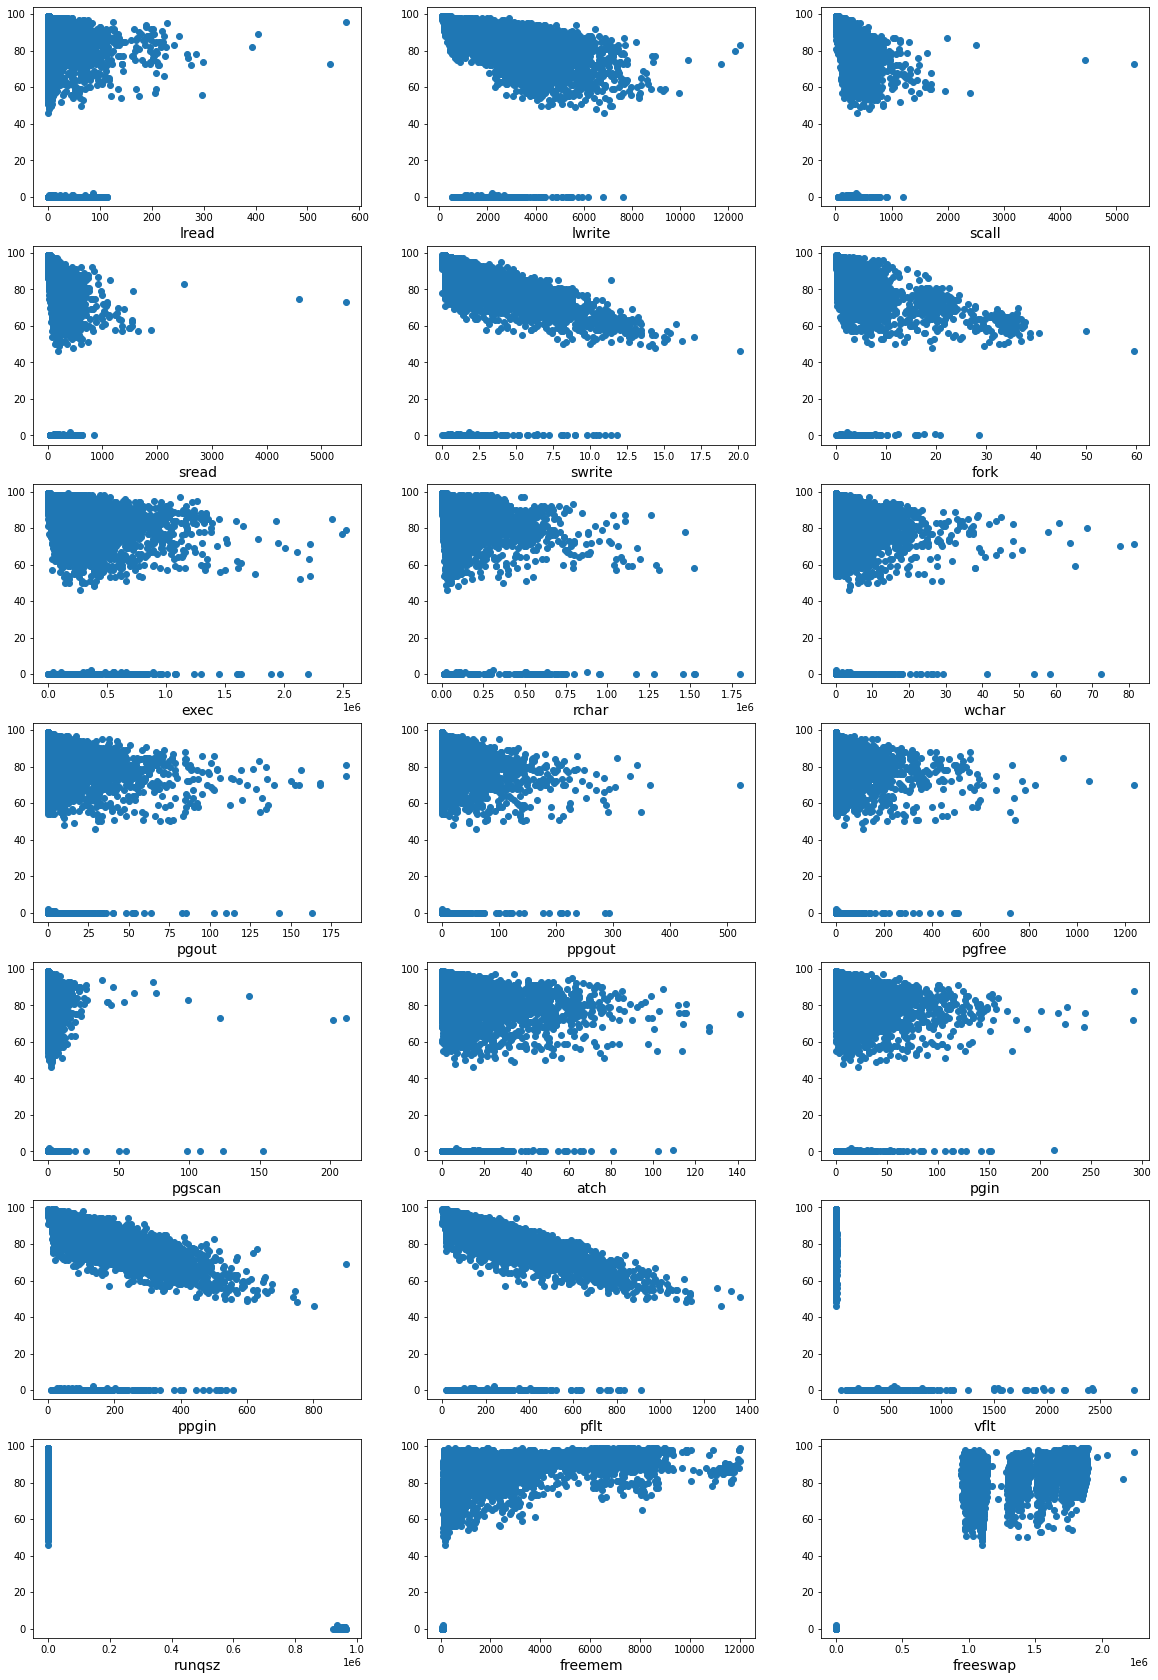

In [15]:
CPU_col=['lread','lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','ppgout','pgfree','pgscan','atch',
         'pgin','ppgin','pflt','vflt','runqsz','freemem','freeswap','usr','sys','wio','idle']
fig,ax=plt.subplots(7,3,figsize=(20,30))
for i in range(1,22):
    ax[(i-1)//3,i-(i-1)//3*3-1].scatter(CPU.iloc[:,i],CPU.iloc[:,22])
    ax[(i-1)//3,i-(i-1)//3*3-1].set_xlabel(CPU_col[i-1],fontsize=14)

In [3]:
# feature scaling
cpu=pd.DataFrame()
for i in range(22):
    variable=CPU.iloc[:,i+1].values
    # (x-min(x))/(max(x)-min(x))
    cpu[i]=(variable-variable.min())/(variable.max()-variable.min())
cpu.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.000000,0.289971,0.076054,0.035419,0.168489,0.097213,0.215364,0.136493,0.036714,0.043322,...,0.005672,0.151275,0.184170,0.686997,0.312830,0.000354,0.000001,0.010441,0.498496,0.757576
1,0.000000,0.270510,0.069089,0.070472,0.278330,0.026864,0.093926,0.226903,0.024558,0.011944,...,0.001891,0.019830,0.018455,0.297844,0.305539,0.000425,0.000084,0.010274,0.612965,0.797980
2,0.006957,0.364826,0.240399,0.023674,0.099404,0.060275,0.201642,0.027370,0.107809,0.147394,...,0.005672,0.036756,0.032740,0.196544,0.198168,0.000283,0.000084,0.015703,0.504059,0.797980
3,0.000000,0.330103,0.116905,0.090108,0.277833,0.033580,0.108598,0.077936,0.039170,0.058523,...,0.000000,0.142776,0.080483,0.311447,0.363870,0.000283,0.000063,0.008854,0.437124,0.777778
4,0.001739,0.380491,0.043298,0.046063,0.099404,0.157488,0.033088,0.265742,0.000000,0.000000,...,0.000000,0.074929,0.036157,0.082741,0.119922,0.000354,0.000084,0.075844,0.462380,0.808081


In [4]:
X = np.array(cpu.iloc[:,:-1]);y=np.array(cpu.iloc[:,-1])
train_length=6500
X_train = X[:train_length]
y_train = y[:train_length]
X_test = X[train_length:]
y_test = y[train_length:]
print(X.shape,y.shape)

(8192, 21) (8192,)


### 1.2 Grid search

In [5]:
import time
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'epsilon':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVR(kernel='rbf'),param_grid,refit = True, verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] C=1, epsilon=1, gamma=1 .........................................
[CV] .......................... C=1, epsilon=1, gamma=1, total=   0.0s
[CV] C=1, epsilon=1, gamma=1 .........................................
[CV] .......................... C=1, epsilon=1, gamma=1, total=   0.0s
[CV] C=1, epsilon=1, gamma=1 .........................................
[CV] .......................... C=1, epsilon=1, gamma=1, total=   0.0s
[CV] C=1, epsilon=1, gamma=1 .........................................
[CV] .......................... C=1, epsilon=1, gamma=1, total=   0.0s
[CV] C=1, epsilon=1, gamma=1 .........................................
[CV] .......................... C=1, epsilon=1, gamma=1, total=   0.0s
[CV] C=1, epsilon=1, gamma=0.1 .......................................
[CV] ........................ C=1, epsilon=1, gamma=0.1, total=   0.0s
[CV] C=1, epsilon=1, gamma=0.1 .......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1, epsilon=0.1, gamma=1, total=   0.1s
[CV] C=1, epsilon=0.1, gamma=1 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=1, total=   0.1s
[CV] C=1, epsilon=0.1, gamma=1 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=1, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=1 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=1, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.1 .....................................
[CV] ...................... C=1, epsilon=0.1, gamma=0.1, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.1 .....................................
[CV] ...................... C=1, epsilon=0.1, gamma=0.1, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.1 .....................................
[CV] ...................... C=1, epsilon=0.1, gamma=0.1, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.1 .....................................
[CV] .

[CV] .................... C=1, epsilon=0.001, gamma=0.1, total=   2.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ................... C=1, epsilon=0.001, gamma=0.01, total=   1.8s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ................... C=1, epsilon=0.001, gamma=0.01, total=   2.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ................... C=1, epsilon=0.001, gamma=0.01, total=   1.9s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ................... C=1, epsilon=0.001, gamma=0.01, total=   1.8s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ................... C=1, epsilon=0.001, gamma=0.01, total=   1.8s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .................. C=1, epsilon=0.001, gamma=0.001, total=   1.8s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .

[CV] .................. C=10, epsilon=0.1, gamma=0.0001, total=   0.2s
[CV] C=10, epsilon=0.1, gamma=0.0001 .................................
[CV] .................. C=10, epsilon=0.1, gamma=0.0001, total=   0.2s
[CV] C=10, epsilon=0.1, gamma=0.0001 .................................
[CV] .................. C=10, epsilon=0.1, gamma=0.0001, total=   0.2s
[CV] C=10, epsilon=0.1, gamma=0.0001 .................................
[CV] .................. C=10, epsilon=0.1, gamma=0.0001, total=   0.2s
[CV] C=10, epsilon=0.1, gamma=0.0001 .................................
[CV] .................. C=10, epsilon=0.1, gamma=0.0001, total=   0.2s
[CV] C=10, epsilon=0.01, gamma=1 .....................................
[CV] ...................... C=10, epsilon=0.01, gamma=1, total=   6.1s
[CV] C=10, epsilon=0.01, gamma=1 .....................................
[CV] ...................... C=10, epsilon=0.01, gamma=1, total=   5.7s
[CV] C=10, epsilon=0.01, gamma=1 .....................................
[CV] .

[CV] ...................... C=100, epsilon=0.1, gamma=1, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=1 .....................................
[CV] ...................... C=100, epsilon=0.1, gamma=1, total=   0.2s
[CV] C=100, epsilon=0.1, gamma=1 .....................................
[CV] ...................... C=100, epsilon=0.1, gamma=1, total=   0.0s
[CV] C=100, epsilon=0.1, gamma=1 .....................................
[CV] ...................... C=100, epsilon=0.1, gamma=1, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=1 .....................................
[CV] ...................... C=100, epsilon=0.1, gamma=1, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=0.1 ...................................
[CV] .................... C=100, epsilon=0.1, gamma=0.1, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=0.1 ...................................
[CV] .................... C=100, epsilon=0.1, gamma=0.1, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=0.1 ...................................
[CV] .

[CV] .................. C=100, epsilon=0.001, gamma=0.1, total=  13.6s
[CV] C=100, epsilon=0.001, gamma=0.1 .................................
[CV] .................. C=100, epsilon=0.001, gamma=0.1, total=  13.3s
[CV] C=100, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=100, epsilon=0.001, gamma=0.01, total=   3.6s
[CV] C=100, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=100, epsilon=0.001, gamma=0.01, total=   3.5s
[CV] C=100, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=100, epsilon=0.001, gamma=0.01, total=   3.4s
[CV] C=100, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=100, epsilon=0.001, gamma=0.01, total=   3.4s
[CV] C=100, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=100, epsilon=0.001, gamma=0.01, total=   3.6s
[CV] C=100, epsilon=0.001, gamma=0.001 ...............................
[CV] .

[CV] ................. C=1000, epsilon=0.1, gamma=0.001, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=0.001 ................................
[CV] ................. C=1000, epsilon=0.1, gamma=0.001, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=0.001 ................................
[CV] ................. C=1000, epsilon=0.1, gamma=0.001, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=0.001 ................................
[CV] ................. C=1000, epsilon=0.1, gamma=0.001, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=0.0001 ...............................
[CV] ................ C=1000, epsilon=0.1, gamma=0.0001, total=   0.0s
[CV] C=1000, epsilon=0.1, gamma=0.0001 ...............................
[CV] ................ C=1000, epsilon=0.1, gamma=0.0001, total=   0.0s
[CV] C=1000, epsilon=0.1, gamma=0.0001 ...............................
[CV] ................ C=1000, epsilon=0.1, gamma=0.0001, total=   0.0s
[CV] C=1000, epsilon=0.1, gamma=0.0001 ...............................
[CV] .

[CV] .............. C=1000, epsilon=0.001, gamma=0.0001, total=   2.7s


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 102.8min finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'epsilon': [1, 0.1, 0.01, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [9]:
grid.best_params_

{'C': 100, 'epsilon': 0.01, 'gamma': 0.1}

### 1.3 Random Fourier Feature

In [9]:
# median adjustment
xmedian=np.array([stat.median(X_train[:,i]) for i in range(21)]);print(xmedian)

[1.73913043e-03 1.56048127e-01 2.99322289e-02 2.01871903e-02
 3.97614314e-02 2.01477502e-02 4.94054515e-02 2.49979863e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.98300283e-02 1.29865692e-02 7.09824405e-02
 8.82033998e-02 3.54358611e-04 8.38197813e-05 4.41029068e-02
 5.07082341e-01]


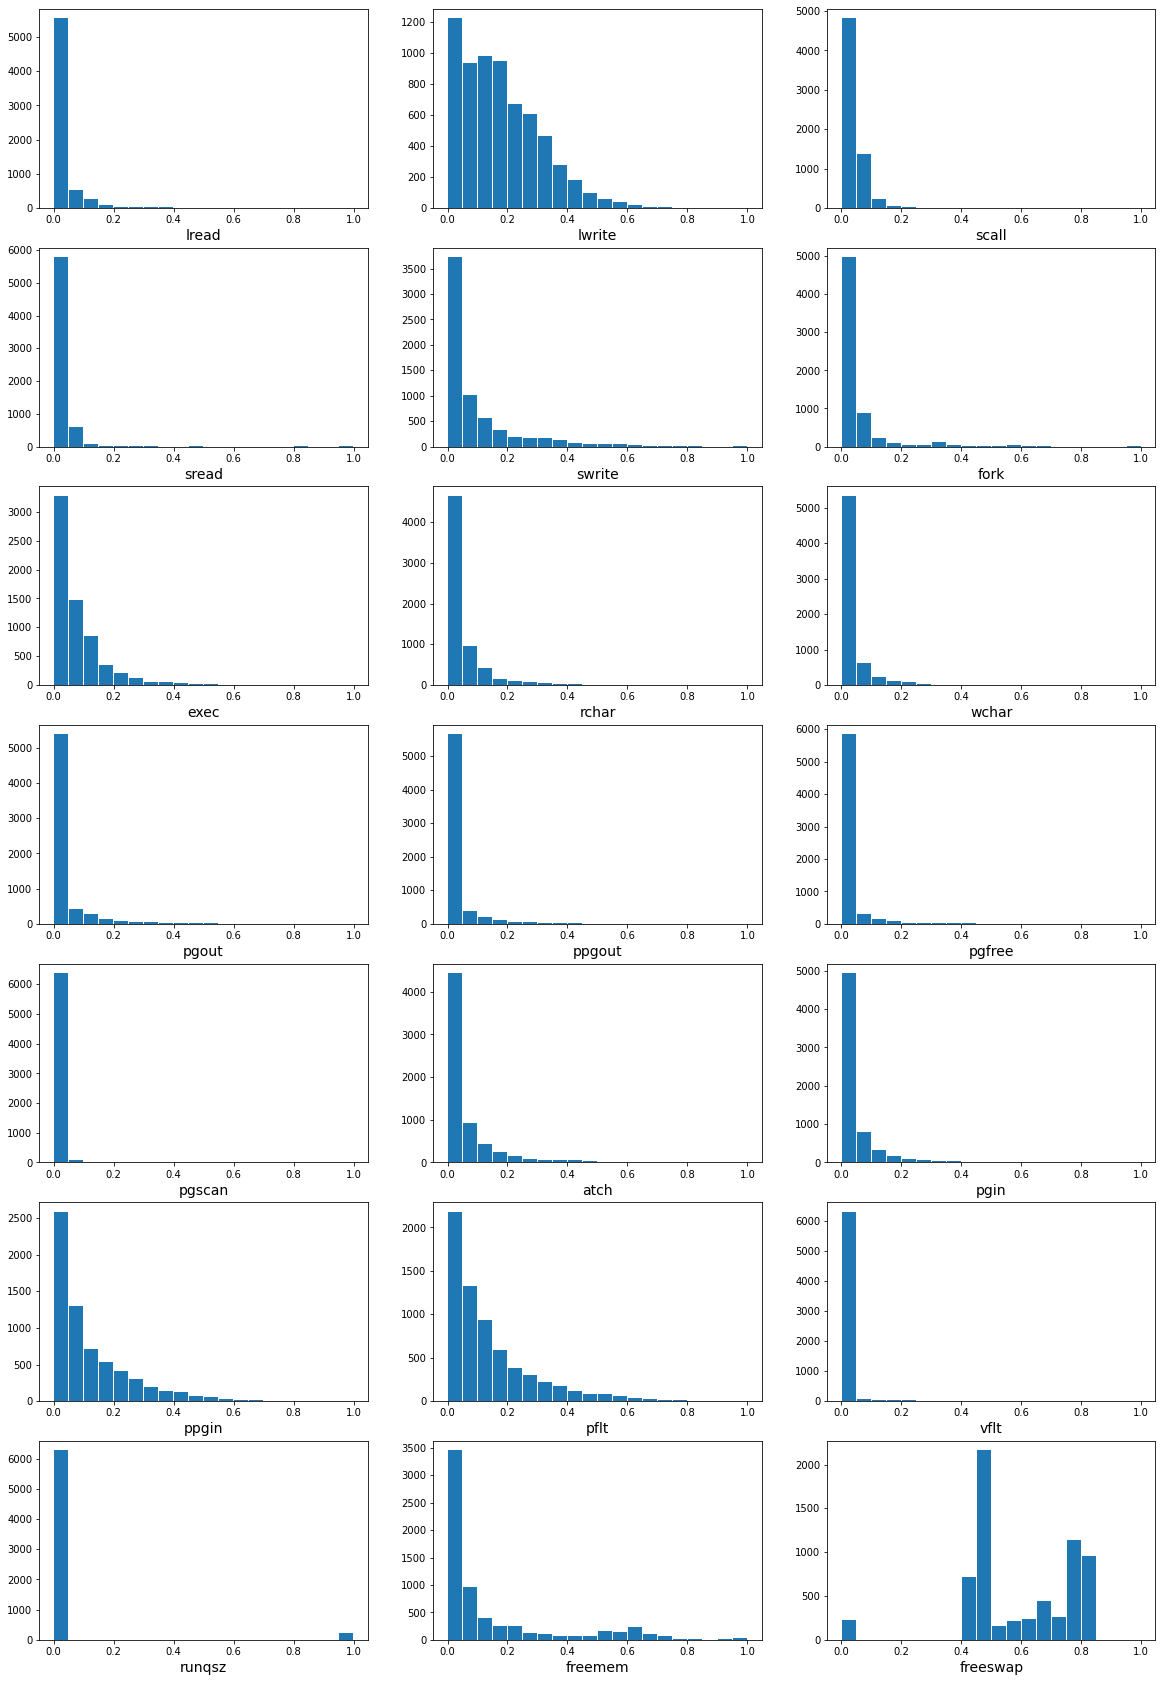

In [24]:
fig,ax=plt.subplots(7,3,figsize=(20,30))
for i in range(21):
    ax[i//3,i-i//3*3].hist(X_train[:,i],bins=[0.05*i for i in range(21)],rwidth=0.9)
    ax[i//3,i-i//3*3].set_xlabel(CPU_col[i],fontsize=14)

In [7]:
## Guassian kernel
def guassian(x,y,sigma):
    return np.exp(-np.linalg.norm(x-y)**2/(2*sigma**2))

## Random Fourier feature
def FRF(X,w,b):
    D=b.shape[0]
    z=np.matmul(w,X.T)+b.reshape(D,1)
    return (2/D)**0.5*np.cos(z).T

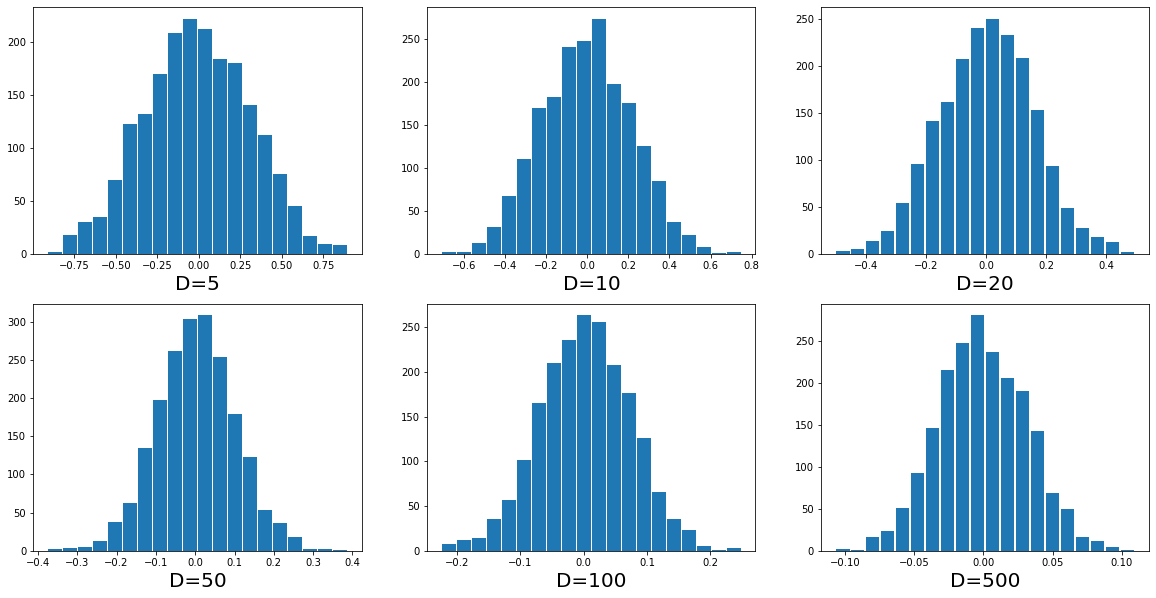

In [8]:
fig,ax=plt.subplots(2,3,figsize=(20,10));Dnum=[5,10,20,50,100,500]
for j in range(6):
    approz=[]
    for i in range(2000):
        N=Dnum[j]
        d=X.shape[1];mean=np.zeros(d);variance=np.eye(d)/5
        w=np.random.multivariate_normal(mean,variance,N)
        b=np.random.uniform(0,2*np.pi,N)
        z=np.matmul(xmedian,w.T)+b
        X_frf=(2/N)**0.5*np.cos(z)
        approz.append(np.matmul(X_frf,X_frf))
    ax[j//3,j-j//3*3].hist(np.array(approz)-1,rwidth=0.9,bins=20)
    ax[j//3,j-j//3*3].set_xlabel('D='+str(Dnum[j]),fontsize=20)

0
1
2
3
4
5


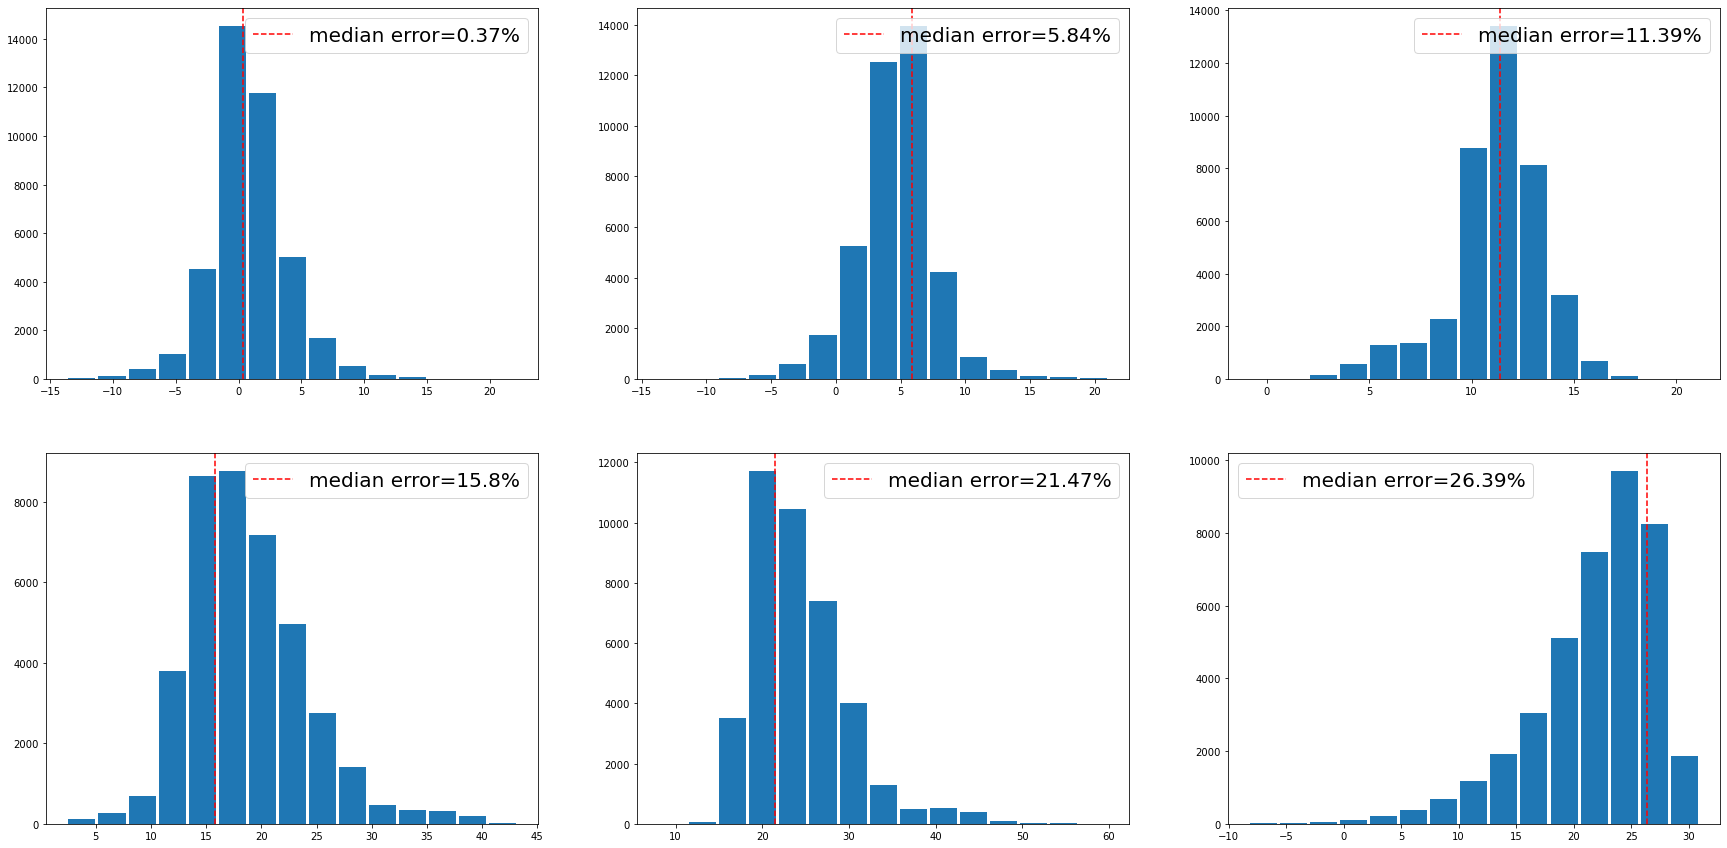

In [10]:
rd.seed(123);sigma=5**0.5;np.random.seed(1)
xi=rd.sample([*range(6500)],200)
## kernel of x_train
gauX=np.array([[guassian(X_train[i],X_train[j],sigma)for i in xi] for j in xi]).ravel()

fig,ax=plt.subplots(2,3,figsize=(30,15))
we=[[] for i in range(6)];l=np.array([1 for i in range(6)])
d=X.shape[1];mean=np.zeros(d);variance=np.eye(d)/5
while len(l[np.array([len(k)>=1 for k in we])])<6:
    w=np.random.multivariate_normal(mean,variance,50)
    b=np.random.uniform(0,2*np.pi,50)
    z=np.matmul(xmedian,w.T)+b
    X_frf=(2/50)**0.5*np.cos(z)
    if np.matmul(X_frf,X_frf)-1<0.01 and np.matmul(X_frf,X_frf)-1>0:
        # small error of median
        we[0].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.matmul(X_frf,X_frf)-1<0.1 and np.matmul(X_frf,X_frf)-1>0.05:
        # large error of median
        we[1].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.matmul(X_frf,X_frf)-1<0.15 and np.matmul(X_frf,X_frf)-1>0.1:
        # large error of median
        we[2].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.matmul(X_frf,X_frf)-1<0.2 and np.matmul(X_frf,X_frf)-1>0.15:
        # large error of median
        we[3].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.matmul(X_frf,X_frf)-1<0.25 and np.matmul(X_frf,X_frf)-1>0.2:
        # large error of median
        we[4].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.matmul(X_frf,X_frf)-1<0.3 and np.matmul(X_frf,X_frf)-1>0.25:
        # large error of median
        we[5].append([w,b,np.matmul(X_frf,X_frf)-1])

wlist=[];blist=[];erlist=[]
for i in range(6):
    # find small error w,b
    print(i)
    ## random fourier feature approximate
    X_frf=FRF(X_train,we[i][0][0],we[i][0][1])
    frfX=np.array([[np.matmul(X_frf[i],X_frf[j]) for i in xi] for j in xi]).ravel()
    
    ax[i//3,i-i//3*3].hist(100*(frfX-gauX)/gauX,rwidth=0.9,bins=15)
    ax[i//3,i-i//3*3].axvline(x=100*we[i][0][2],linestyle='--',label='median error='+str(round(100*we[i][0][2],2))+'%',c='red')
    ax[i//3,i-i//3*3].legend(fontsize=20)
    wlist.append(we[i][0][0]);blist.append(we[i][0][1]);erlist.append(we[i][0][2])
    
    
plt.show()

0
1
2
3
4
5


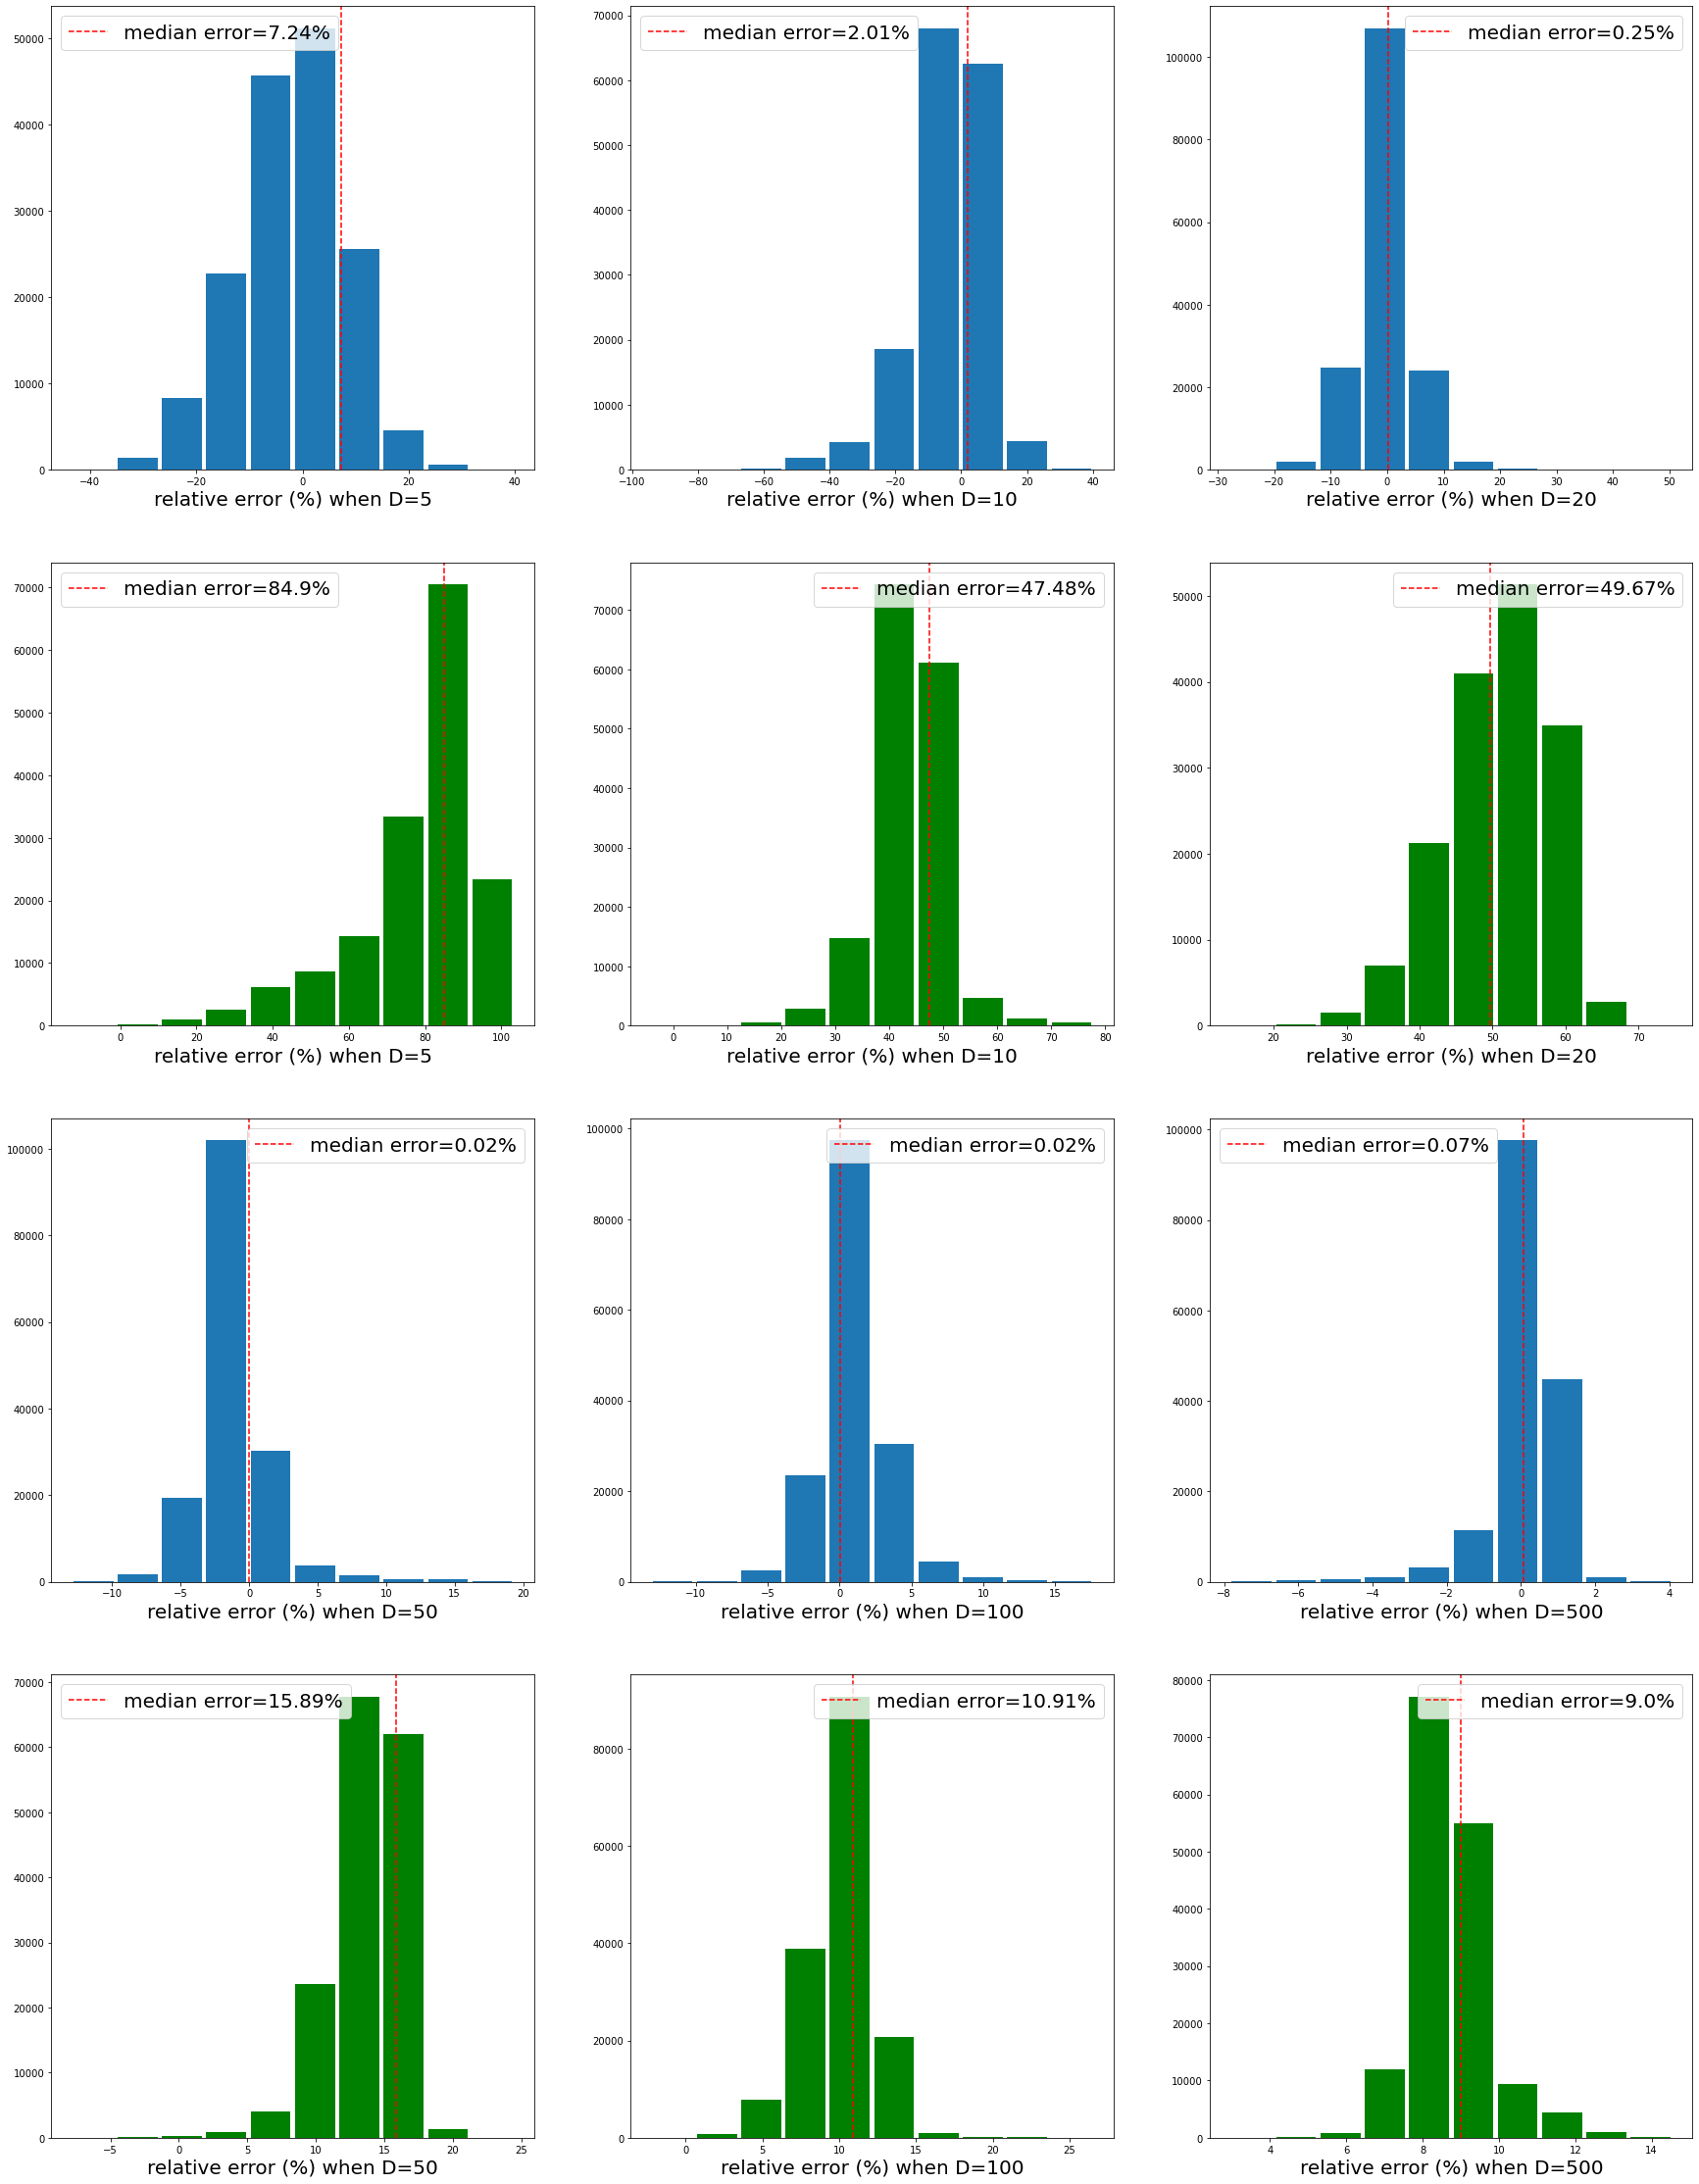

In [11]:
rd.seed(123);sigma=5**0.5;er=[0.1,0.05,0.005,0.001,0.001,0.001];err=[0.75,0.35,0.25,0.15,0.1,0.05];np.random.seed(1)
xi=rd.sample([*range(6500)],400)
## kernel of x_train
gauX=np.array([[guassian(X_train[i],X_train[j],sigma)for i in xi] for j in xi]).ravel()

fig,ax=plt.subplots(4,3,figsize=(30,40));Dnum=[5,10,20,50,100,500]
ws=[];wl=[]
for i in range(6):
    # find small error w,b
    wsmall=[];wlarge=[]
    d=X.shape[1];mean=np.zeros(d);variance=np.eye(d)/5
    while len(wsmall)<=1 or len(wlarge)<=1:
        w=np.random.multivariate_normal(mean,variance,Dnum[i])
        b=np.random.uniform(0,2*np.pi,Dnum[i])
        z=np.matmul(xmedian,w.T)+b
        X_frf=(2/Dnum[i])**0.5*np.cos(z)
        if np.matmul(X_frf,X_frf)-1<er[i] and np.matmul(X_frf,X_frf)-1>0:
            # small error of median
            wsmall.append([w,b,np.matmul(X_frf,X_frf)-1])
        elif np.matmul(X_frf,X_frf)-1>err[i]:
            # large error of median
            wlarge.append([w,b,np.matmul(X_frf,X_frf)-1])
    print(i)
    ## random fourier feature approximate
    X_frf=FRF(X_train,wsmall[0][0],wsmall[0][1])
    frfX=np.array([[np.matmul(X_frf[i],X_frf[j]) for i in xi] for j in xi]).ravel()
    
    ax[0+2*(i//3),i%3].hist(100*(frfX-gauX)/gauX,rwidth=0.9,bins=10)
    ax[0+2*(i//3),i%3].axvline(x=100*wsmall[0][2],linestyle='--',label='median error='+str(round(100*wsmall[0][2],2))+'%',c='red')
    ax[0+2*(i//3),i%3].set_xlabel('relative error (%) when D='+str(Dnum[i]),fontsize=20)
    ax[0+2*(i//3),i%3].legend(fontsize=20)
    
    X_frf=FRF(X_train,wlarge[0][0],wlarge[0][1])
    frfX=np.array([[np.matmul(X_frf[i],X_frf[j]) for i in xi] for j in xi]).ravel()
    ax[1+2*(i//3),i%3].hist(100*(frfX-gauX)/gauX,rwidth=0.9,color='g',bins=10)
    ax[1+2*(i//3),i%3].axvline(x=100*wlarge[0][2],linestyle='--',label='median error='+str(round(100*wlarge[0][2],2))+'%',c='red')
    ax[1+2*(i//3),i%3].set_xlabel('relative error (%) when D='+str(Dnum[i]),fontsize=20)
    ax[1+2*(i//3),i%3].legend(fontsize=20)
    ws.append(wsmall[0]);wl.append(wlarge[0])
plt.show()

In [12]:
w1,b1,e1=ws[3];w2,b2,e2=wlist[5],blist[5],erlist[5];w3,b3,e3=wlist[1],blist[1],erlist[1];w4,b4,e4=wlist[3],blist[3],erlist[3]
# Fourier approximation of training set
X1_frf=FRF(X_train,w1,b1);X2_frf=FRF(X_train,w2,b2);X3_frf=FRF(X_train,w3,b3);X4_frf=FRF(X_train,w4,b4)
# Fourier approximation of test set
T1_frf=FRF(X_test,w1,b1);T2_frf=FRF(X_test,w2,b2);T3_frf=FRF(X_test,w3,b3);T4_frf=FRF(X_test,w4,b4)
print(erlist)

[0.003714169915725929, 0.058366256028643315, 0.11394651407149237, 0.15797355833715754, 0.2146677493585194, 0.2639144425308646]


### 1.4 LibSVR,SVR, SVMlight
**$\epsilon = 0.01$**

In [13]:
# SVR
# parameters via grid serch: C=100, epsilon=0.01, gamma=0.1
timeu=[];i=0
while i <21:
    print(i)
    start_time=time.time()
    model1=SVR(kernel='rbf',C=0.1,epsilon=0.01,gamma=0.1)
    model1.fit(X_train,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
print('time used:',np.array(timeu).mean())

print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

# prediction
pre1=model1.predict(X_train);tre1=model1.predict(X_test)
# error of prediction
err1=y_train-pre1;terr1=y_test-tre1
# denominator of R-score
den1=((err1-err1.mean())**2).sum();den2=((terr1-terr1.mean())**2).sum()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
time used: 0.7705949034009661
0.9778100889535101
0.9811045300495383


In [16]:
xsim=[];tsim=[];m_err=[];we=[[] for i in range(6)];l=np.array([1 for i in range(6)]);np.random.seed(1)
while len(l[np.array([len(k)>=200 for k in we])])<6:
    w=np.random.multivariate_normal(mean,variance,50)
    b=np.random.uniform(0,2*np.pi,50)
    z=np.matmul(xmedian,w.T)+b
    X_frf=(2/50)**0.5*np.cos(z)
    if np.abs(np.matmul(X_frf,X_frf)-1)<0.05 and np.abs(np.matmul(X_frf,X_frf)-1)>0:
        # small error of median
        we[0].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.abs(np.matmul(X_frf,X_frf)-1)<0.1 and np.abs(np.matmul(X_frf,X_frf)-1)>0.05:
        # large error of median
        we[1].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.abs(np.matmul(X_frf,X_frf)-1)<0.15 and np.abs(np.matmul(X_frf,X_frf)-1)>0.1:
        # large error of median
        we[2].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.abs(np.matmul(X_frf,X_frf)-1)<0.2 and np.abs(np.matmul(X_frf,X_frf)-1)>0.15:
        # large error of median
        we[3].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.abs(np.matmul(X_frf,X_frf)-1)<0.25 and np.abs(np.matmul(X_frf,X_frf)-1)>0.2:
        # large error of median
        we[4].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.abs(np.matmul(X_frf,X_frf)-1)>0.25:
        # large error of median
        we[5].append([w,b,np.matmul(X_frf,X_frf)-1])
    
par=[]
for i in range(6):
    par=par+we[i][:200]    

In [28]:
i=0;xsim=[];tsim=[];m_err=[]
for p in par:
    i=i+1;print(i)
    # median error
    m_err.append(p[2])
    X1_frf=FRF(X_train,p[0],p[1]);T1_frf=FRF(X_test,p[0],p[1])
    # model fitting
    model2=LinearSVR(C=0.1,epsilon=0.01)
    model2.fit(X1_frf,y_train)
    prelib=model2.predict(X1_frf);trelib=model2.predict(T1_frf)
    # model similarity
    diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
    xsim.append(diff1);tsim.append(diff2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Text(0.5, 0, 'Absolute value of median error')

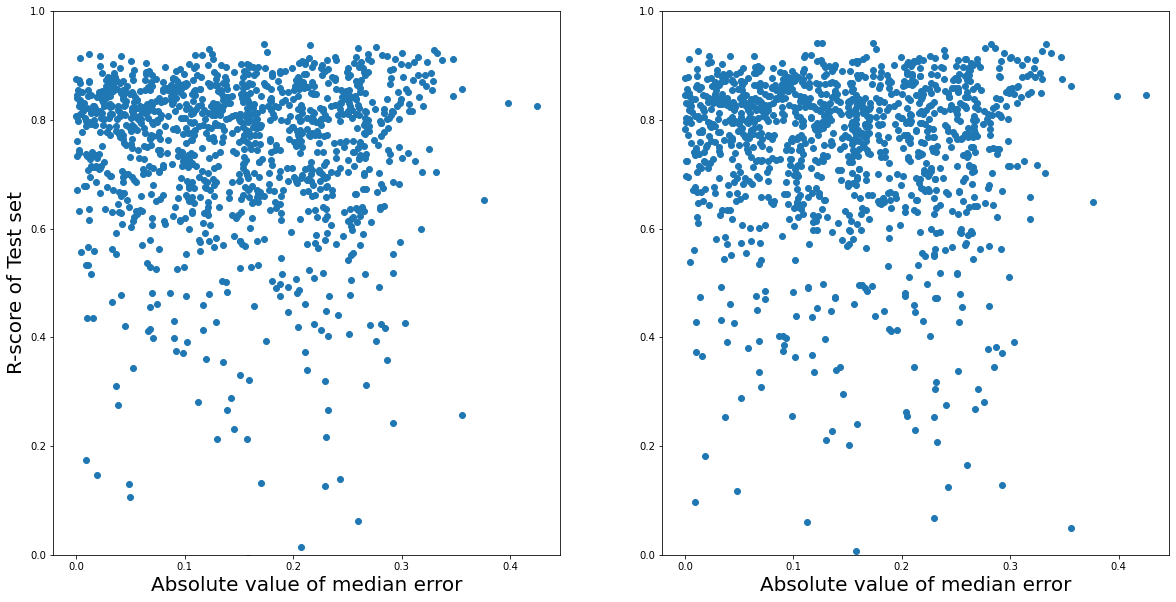

In [32]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].scatter([np.abs(i) for i in m_err],xsim)
ax[0].set_ylim([0,1])
ax[0].set_ylabel('R-score of Training set',fontsize=20);ax[0].set_xlabel('Absolute value of median error',fontsize=20)
ax[1].scatter([np.abs(i) for i in m_err],tsim)
ax[1].set_ylim([0,1])
ax[0].set_ylabel('R-score of Test set',fontsize=20);ax[1].set_xlabel('Absolute value of median error',fontsize=20)

In [20]:
den3=((pre1-pre1.mean())**2).sum();den4=((tre1-tre1.mean())**2).sum()
# LibSVR, random fourier approximation: C=100, epsilon=0.01
timeu=[];xscore=[];tscore=[];xsim=[];tsim=[];i=0
while i <21:
    start_time=time.time()
    model2=LinearSVR(C=0.1,epsilon=0.01)
    model2.fit(X1_frf,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
    xscore.append(model2.score(X1_frf,y_train));tscore.append(model2.score(T1_frf,y_test))
    prelib=model2.predict(X1_frf);trelib=model2.predict(T1_frf)
    # model similarity
    diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
    xsim.append(diff1);tsim.append(diff2)
    diff1=1-((pre1-prelib)**2).sum()/den3;diff2=1-((tre1-trelib)**2).sum()/den4
    xsim1.append(diff1);tsim1.append(diff2)
print('time used:',np.array(timeu).mean())
print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
print('model similarity(train):',np.array(xsim).mean(),np.array(xsim1).mean(),',(test):',np.array(tsim).mean(),np.array(tsim1).mean())
print(e1*100)

timeu=[];xscore=[];tscore=[];xsim=[];tsim=[];xsim1=[];tsim1=[];i=0
while i <21:
    start_time=time.time()
    model2=LinearSVR(C=0.1,epsilon=0.01)
    model2.fit(X2_frf,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
    xscore.append(model2.score(X2_frf,y_train));tscore.append(model2.score(T2_frf,y_test))
    prelib=model2.predict(X2_frf);trelib=model2.predict(T2_frf)
    # model similarity
    diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
    xsim.append(diff1);tsim.append(diff2)
    diff1=1-((pre1-prelib)**2).sum()/den3;diff2=1-((tre1-trelib)**2).sum()/den4
    xsim1.append(diff1);tsim1.append(diff2)
print('time used:',np.array(timeu).mean())
print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
print('model similarity(train):',np.array(xsim).mean(),np.array(xsim1).mean(),',(test):',np.array(tsim).mean(),np.array(tsim1).mean())
print(e2*100)

timeu=[];xscore=[];tscore=[];xsim=[];tsim=[];xsim1=[];tsim1=[];i=0
while i <21:
    start_time=time.time()
    model2=LinearSVR(C=0.1,epsilon=0.01)
    model2.fit(X3_frf,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
    xscore.append(model2.score(X3_frf,y_train));tscore.append(model2.score(T3_frf,y_test))
    prelib=model2.predict(X3_frf);trelib=model2.predict(T3_frf)
    # model similarity
    diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
    xsim.append(diff1);tsim.append(diff2)
    diff1=1-((pre1-prelib)**2).sum()/den3;diff2=1-((tre1-trelib)**2).sum()/den4
    xsim1.append(diff1);tsim1.append(diff2)
print('time used:',np.array(timeu).mean())
print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
print('model similarity(train):',np.array(xsim).mean(),np.array(xsim1).mean(),',(test):',np.array(tsim).mean(),np.array(tsim1).mean())
print(e3*100)

timeu=[];xscore=[];tscore=[];xsim=[];tsim=[];xsim1=[];tsim1=[];i=0
while i <21:
    start_time=time.time()
    model2=LinearSVR(C=0.1,epsilon=0.01)
    model2.fit(X4_frf,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
    xscore.append(model2.score(X4_frf,y_train));tscore.append(model2.score(T4_frf,y_test))
    prelib=model2.predict(X4_frf);trelib=model2.predict(T4_frf)
    # model similarity
    diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
    xsim.append(diff1);tsim.append(diff2)
    diff1=1-((pre1-prelib)**2).sum()/den3;diff2=1-((tre1-trelib)**2).sum()/den4
    xsim1.append(diff1);tsim1.append(diff2)
print('time used:',np.array(timeu).mean())
print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
print('model similarity(train):',np.array(xsim).mean(),np.array(xsim1).mean(),',(test):',np.array(tsim).mean(),np.array(tsim1).mean())
print(e4*100)

time used: 0.06048212732587542
performance socre(train): 0.9721102448239662 ,(test): 0.9781838733006912
model similarity(train): 0.8279283006016995 0.9961376227171626 ,(test): 0.8806808681699135 0.9977225322751062
0.015276616023962575
time used: 0.06511609894888741
performance socre(train): 0.97174272415859 ,(test): 0.9765748486795334
model similarity(train): 0.8387454428166764 0.996380427806567 ,(test): 0.8576306746797518 0.9972825687007724
26.391444253086462
time used: 0.06176216261727469
performance socre(train): 0.9740016530433938 ,(test): 0.9780418410478392
model similarity(train): 0.8824016928594102 0.9973603501819982 ,(test): 0.8833738324965824 0.9977739334145898
5.8366256028643315
time used: 0.06394320442563012
performance socre(train): 0.9696879794103395 ,(test): 0.9738126138285368
model similarity(train): 0.663890222305596 0.9924555707042712 ,(test): 0.572242810145711 0.9918353144291084
15.797355833715754


**SVMlight**

In [33]:
num_feature = X_train.shape[1]
with open('svmlight_train_cpu.txt','w') as f:
    for i in range(train_length):
        label = str(y_train[i])
        
        feature_pair = ''
        for index in range(num_feature):
            feature_pair = feature_pair + ' '+str(index+1)+':'+str(X_train[i][index])
            
        sample = label + feature_pair+'\n'
        f.writelines(sample)

In [34]:
with open('svmlight_test_cpu.txt','w') as f:
    for i in range(X_test.shape[0]):
        label = str(y_test[i])
        
        feature_pair = ''
        for index in range(num_feature):
            feature_pair = feature_pair + ' '+str(index+1)+':'+str(X_test[i][index])
            
        sample = label + feature_pair+'\n'
        f.writelines(sample)

In [22]:
# SVMlight -z:regression,-c: C=0.1, -w: epsilon=0.01, -t:rbf kernel, -g: gamma=0.1
!svm_learn.exe -z r -c 0.1 -w 0.01 -t 2 -g 0.1 svmlight_train_cpu.txt

!svm_classify.exe svmlight_train_cpu.txt svm_model train_cpu.txt

!svm_classify.exe svmlight_test_cpu.txt svm_model test_cpu.txt

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..OK. (6500 examples read)
Optimizing................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [23]:
f=open('train_cpu.txt')
cpu_train = []
for l in f:
    s=l.split( )
    cpu_train.append(float(s[0]))
f.close()

f=open('test_cpu.txt')
cpu_test = []
for l in f:
    s=l.split( )
    cpu_test.append(float(s[0]))
f.close()
# R-score
r_s=1-((np.array(cpu_train)-y_train)**2).sum()/((y_train-y_train.mean())**2).sum()
r_t=1-((np.array(cpu_test)-y_test)**2).sum()/((y_test-y_test.mean())**2).sum()

print('R_score:',r_s,r_t)

#similarity
s_light=1-((np.array(cpu_train)-pre1)**2).sum()/den1
t_light=1-((np.array(cpu_test)-tre1)**2).sum()/den2

print('similarity:',s_light,t_light)

R_score: 0.9778335401135773 0.9811345599037853
similarity: 0.999802388955108 0.9997864681870635


$\epsilon=0.1$

In [24]:
# SVR
# parameters via grid serch: C=0.1, epsilon=0.1, gamma=0.1
timeu=[];i=0
while i <21:
    print(i)
    start_time=time.time()
    model1=SVR(kernel='rbf',C=0.1,epsilon=0.1,gamma=0.1)
    model1.fit(X_train,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
print('time used:',np.array(timeu).mean())

print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

# prediction
pre1=model1.predict(X_train);tre1=model1.predict(X_test)
# error of prediction
err1=y_train-pre1;terr1=y_test-tre1
# denominator of R-score
den1=((err1-err1.mean())**2).sum();den2=((terr1-terr1.mean())**2).sum()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
time used: 0.02813321068173363
0.9171228966346034
0.9273357607797051


In [25]:
# LibSVR, random fourier approximation: C=100, epsilon=0.01
timeu=[];xscore=[];tscore=[];xsim=[];tsim=[];i=0
while i <21:
    start_time=time.time()
    model2=LinearSVR(C=0.1,epsilon=0.1)
    model2.fit(X1_frf,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
    xscore.append(model2.score(X1_frf,y_train));tscore.append(model2.score(T1_frf,y_test))
    prelib=model2.predict(X1_frf);trelib=model2.predict(T1_frf)
    # model similarity
    diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
    xsim.append(diff1);tsim.append(diff2)
print('time used:',np.array(timeu).mean())
print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
print('model similarity(train):',np.array(xsim).mean(),',(test):',np.array(tsim).mean())
print(e1*100)

timeu=[];xscore=[];tscore=[];xsim=[];tsim=[];i=0
while i <21:
    start_time=time.time()
    model2=LinearSVR(C=0.1,epsilon=0.1)
    model2.fit(X2_frf,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
    xscore.append(model2.score(X2_frf,y_train));tscore.append(model2.score(T2_frf,y_test))
    prelib=model2.predict(X2_frf);trelib=model2.predict(T2_frf)
    # model similarity
    diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
    xsim.append(diff1);tsim.append(diff2)
print('time used:',np.array(timeu).mean())
print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
print('model similarity(train):',np.array(xsim).mean(),',(test):',np.array(tsim).mean())
print(e2*100)

timeu=[];xscore=[];tscore=[];xsim=[];tsim=[];i=0
while i <21:
    start_time=time.time()
    model2=LinearSVR(C=0.1,epsilon=0.1)
    model2.fit(X3_frf,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
    xscore.append(model2.score(X3_frf,y_train));tscore.append(model2.score(T3_frf,y_test))
    prelib=model2.predict(X3_frf);trelib=model2.predict(T3_frf)
    # model similarity
    diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
    xsim.append(diff1);tsim.append(diff2)
print('time used:',np.array(timeu).mean())
print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
print('model similarity(train):',np.array(xsim).mean(),',(test):',np.array(tsim).mean())
print(e3*100)

timeu=[];xscore=[];tscore=[];xsim=[];tsim=[];i=0
while i <21:
    start_time=time.time()
    model2=LinearSVR(C=0.1,epsilon=0.1)
    model2.fit(X4_frf,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
    xscore.append(model2.score(X4_frf,y_train));tscore.append(model2.score(T4_frf,y_test))
    prelib=model2.predict(X4_frf);trelib=model2.predict(T4_frf)
    # model similarity
    diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
    xsim.append(diff1);tsim.append(diff2)
print('time used:',np.array(timeu).mean())
print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
print('model similarity(train):',np.array(xsim).mean(),',(test):',np.array(tsim).mean())
print(e4*100)

time used: 0.015517053149995349
performance socre(train): 0.9108490038088247 ,(test): 0.9236995333094805
model similarity(train): 0.8644754334930518 ,(test): 0.8928753505243182
0.015276616023962575
time used: 0.0170482907976423
performance socre(train): 0.9140175884763776 ,(test): 0.9239605616300349
model similarity(train): 0.8371511262843546 ,(test): 0.8558531837223418
26.391444253086462
time used: 0.01709875606355213
performance socre(train): 0.9128423550968602 ,(test): 0.9241557016037136
model similarity(train): 0.7422521812264101 ,(test): 0.7613590457676681
5.8366256028643315
time used: 0.016916672388712566
performance socre(train): 0.9136409733365192 ,(test): 0.923967026316315
model similarity(train): 0.7619028925385535 ,(test): 0.766404185265826
15.797355833715754


In [27]:
# SVMlight -z:regression,-c: C=0.1, -w: epsilon=0.01, -t:rbf kernel, -g: gamma=0.1
!svm_learn.exe -z r -c 0.1 -w 0.1 -t 2 -g 0.1 svmlight_train_cpu.txt

!svm_classify.exe svmlight_train_cpu.txt svm_model train_cpu.txt

!svm_classify.exe svmlight_test_cpu.txt svm_model test_cpu.txt

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..OK. (6500 examples read)
Optimizing...............................................................done. (64 iterations)
Optimization finished (maxdiff=0.00054).
Runtime in cpu-seconds: 0.23
Number of SV: 141 (including 129 at upper bound)
L1 loss: loss=1.21338
Norm of weight vector: |w|=1.69656
Norm of longest example vector: |x|=1.00000
Number of kernel evaluations: 2264860
Writing model file...done
Reading model...OK. (141 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600

In [28]:
f=open('train_cpu.txt')
cpu_train = []
for l in f:
    s=l.split( )
    cpu_train.append(float(s[0]))
f.close()

f=open('test_cpu.txt')
cpu_test = []
for l in f:
    s=l.split( )
    cpu_test.append(float(s[0]))
f.close()
# R-score
r_s=1-((np.array(cpu_train)-y_train)**2).sum()/((y_train-y_train.mean())**2).sum()
r_t=1-((np.array(cpu_test)-y_test)**2).sum()/((y_test-y_test.mean())**2).sum()

print('R_score:',r_s,r_t)

#similarity
s_light=1-((np.array(cpu_train)-pre1)**2).sum()/den1
t_light=1-((np.array(cpu_test)-tre1)**2).sum()/den2

print('similarity:',s_light,t_light)

R_score: 0.9173499214748476 0.9275208400824012
similarity: 0.9998672694108306 0.9998733479739517


**Value of D**

In [15]:
Dnum=[5,20,50,500]
for j in range(4):
    print(j)
    timeu=[];xscore=[];tscore=[];xsim=[];tsim=[]
    for i in range(200):
        N=Dnum[j]
        d=X.shape[1];mean=np.zeros(d);variance=np.eye(d)/5
        w=np.random.multivariate_normal(mean,variance,N)
        b=np.random.uniform(0,2*np.pi,N)
        X1_frf=FRF(X_train,w,b);T1_frf=FRF(X_test,w,b)
        start_time=time.time()
        model2=LinearSVR(C=0.1,epsilon=0.01)
        model2.fit(X1_frf,y_train)
        timeu.append(time.time()-start_time)
        xscore.append(model2.score(X1_frf,y_train));tscore.append(model2.score(T1_frf,y_test))
        prelib=model2.predict(X1_frf);trelib=model2.predict(T1_frf)
        # model similarity
        diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
        xsim.append(diff1);tsim.append(diff2)
    print('time used:',np.array(timeu).mean())
    print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
    print('model similarity(train):',np.array(xsim).mean(),',(test):',np.array(tsim).mean())

0
time used: 0.008545492887496947
performance socre(train): 0.5030289961258958 ,(test): 0.49401261401240787
model similarity(train): -20.25366772855789 ,(test): -24.606348014551386
1
time used: 0.023599166870117188
performance socre(train): 0.9211891612128944 ,(test): 0.9258478637252722
model similarity(train): -1.3997337698579384 ,(test): -1.7582105350731934
2
time used: 0.05559525370597839
performance socre(train): 0.9706427745871297 ,(test): 0.9748489687957399
model similarity(train): 0.7512913322069814 ,(test): 0.7448115923780537
3
time used: 0.47882611870765684
performance socre(train): 0.9770855728888316 ,(test): 0.9805825868066145
model similarity(train): 0.9858799142312236 ,(test): 0.9862559355693292
